In [143]:
!pip install face_recognition # dlib library

In [144]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [145]:
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
import skimage as sk
import cv2
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
%matplotlib inline

# HOG Features

In [146]:
!cd "gdrive/My Drive/DATA/Face_Recognition/"
#image = cv.imread()

In [147]:
image = cv2.imread('gdrive/My Drive/DATA/Face_Recognition/clooney.jpeg')

In [148]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  # To convert to RGB format

In [149]:
fd , hog_image = hog(image, orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)
# fd is feature descriptor used to represent the image, Multichannel is true for better output. Block size is (pixels_per_cell)
# Image orientation is the directions in gradient

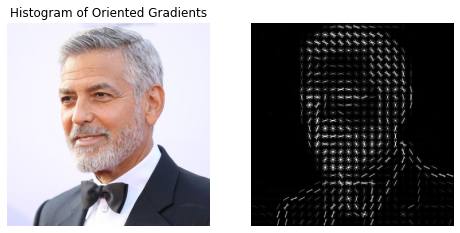

In [150]:
#plot input and hog image
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (8,4),sharex = True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap = plt.cm.gray)
ax1.set_title('Input Image')

# Rescale image for better accuracy 
hog_rescaled = sk.exposure.rescale_intensity(hog_image,in_range = (0,10))
ax2.axis('off')
ax2.imshow(hog_rescaled,cmap = plt.cm.gray)
ax1.set_title('Histogram of Oriented Gradients')
plt.show()


In [151]:
print(len(fd))

5408


In [152]:
image.shape # 3 is depth which represents rgb channel

(416, 416, 3)

# Face Detection

In [153]:
def raptor_facebox(url):
  # Load the image as a numpy array
  image = cv2.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  # Find all faces in the image 
  # Face_Locations = face_recognition.face_locations(image)
  face_location = face_recognition.face_locations(image)     # Returns the location of the face by using a sliding window classifier    
  print("Number of faces found :",len(face_location),"\n")
  # Bounding box on faces
  plt.imshow(image)
  ax = plt.gca()

  # Iterate for all faces found:
  for face_loc in range(len(face_location)):
    # Print the location of face in the image (top,bottom,left,right)
    top, bottom, left, right = face_location[face_loc]
    x,y,w,h = left,top,right,bottom
    print("Face is located at Top : {}, Left : {}, Bottom : {}, Right : {}".format(top,left,bottom,right))

    # Draw the rectangle box in image
    rect = Rectangle((x,y),w-x,h-y,fill = False,color = 'red')
    ax.add_patch(rect)

  # Show output image
  plt.show()

Number of faces found : 1 

Face is located at Top : 98, Left : 284, Bottom : 262, Right : 77


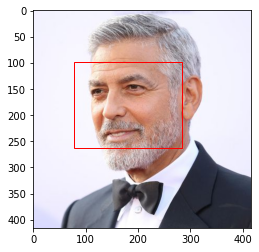

In [154]:
raptor_facebox('gdrive/My Drive/DATA/Face_Recognition/clooney.jpeg')

Number of faces found : 8 

Face is located at Top : 275, Left : 365, Bottom : 295, Right : 205
Face is located at Top : 295, Left : 402, Bottom : 474, Right : 366
Face is located at Top : 285, Left : 375, Bottom : 116, Right : 26
Face is located at Top : 295, Left : 402, Bottom : 641, Right : 533
Face is located at Top : 68, Left : 175, Bottom : 653, Right : 545
Face is located at Top : 80, Left : 155, Bottom : 113, Right : 38
Face is located at Top : 76, Left : 166, Bottom : 484, Right : 394
Face is located at Top : 44, Left : 95, Bottom : 268, Right : 216


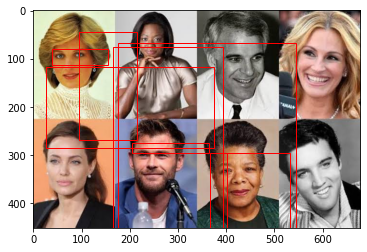

In [157]:
raptor_facebox('gdrive/My Drive/DATA/Face_Recognition/Multiface.jpeg')
# We got the number of faces right but slight mismatch for multiple faces. This must have happend as we are using a pretrained model

# Face Recognition

In [160]:
# Load the faces inorder to extract features using Encoder
# face_demo = face_recognition.load_image_file('img_name.jpg')
image = cv2.imread('gdrive/My Drive/DATA/Face_Recognition/chrishelmsworth.jpeg')
thor = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('gdrive/My Drive/DATA/Face_Recognition/chrisevans.jpeg')
capamerica = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('gdrive/My Drive/DATA/Face_Recognition/rdj.jpeg')
ironman = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


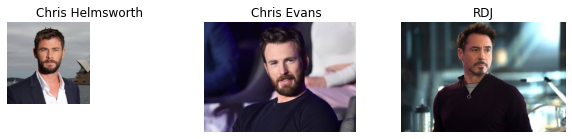

In [161]:
#plotting the images
# Chris Helmsworth
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (10,15),sharex = True, sharey=True)
ax1.axis('off')
ax1.imshow(thor, cmap = plt.cm.gray)
ax1.set_title('Chris Helmsworth')

# Chris Evans
hog_rescaled = sk.exposure.rescale_intensity(hog_image,in_range = (0,10))
ax2.axis('off')
ax2.imshow(capamerica,cmap = plt.cm.gray)
ax2.set_title('Chris Evans')
# RDJ
ax3.axis('off')
ax3.imshow(ironman,cmap = plt.cm.gray)
ax3.set_title('RDJ')
plt.show()

In [162]:
# Computing Faceencodings
# sample_encoding = face_recognition.face_encodings(image)[0] # We write '0' inorder to only consider the first image of the multiple detected.

thor_encode = face_recognition.face_encodings(thor)[0]
captain_encode = face_recognition.face_encodings(capamerica)[0]
ironman_encode = face_recognition.face_encodings(ironman)[0]

# Then, we create a database of the existing encodings, in form of a list.
known_encode = [thor_encode,captain_encode,ironman_encode]

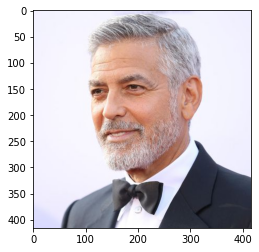

In [163]:
# Load the unknown image, we want to verify
image = cv2.imread('gdrive/My Drive/DATA/Face_Recognition/clooney.jpeg')
unknown = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown)
# we then get the face encodings for the test picture
unknown_encode = face_recognition.face_encodings(unknown)

In [164]:
def raptor_recog(name):
  # Load the unknown image, we want to verify
  image = cv2.imread('gdrive/My Drive/DATA/Face_Recognition/'+name+'.jpeg')
  unknown = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(unknown)
  # we then get the face encodings for the test picture
  unknown_encode = face_recognition.face_encodings(unknown)
  # We loop the image if their are more than one faces:
  for unknown_encode in unknown_encode:
    # Test if we have these faces in our list database encodings
    # results = face_recognition.compare_faces(known_encodings,unknown_encode,tolerace=0.6) # Tolerance here is threshold
    # Compute Euclidien distance b/w encodings
    results = []
    for known_encodings in known_encode:
        d = distance.euclidean(known_encodings,unknown_encode)
        results.append(d)
    print("Results \t",results,"\n")
    threshold = 0.6
    values = np.array(results) <= threshold
    name = name
    if values.any():
      if values[0]:
        name = "Chris Helmsworth"
      elif values[1]:
        name = "Chris Evans"
      elif values[2]:
        name = "Robert Jr"
      print(f"found {name} in the photo\n")  
    else:
      print(f"Not found {name} in known db\n" )

Results 	 [0.793790670104811, 0.73557558399659, 0.7454132712125393] 

Not found clooney in known db



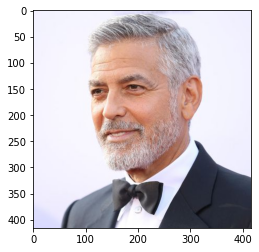

In [165]:
# Computing it for unknown image defined above
raptor_recog('clooney')
# We got the expected output that Clooney image is not present in db
# The code returns the distance b/w each image in database

Results 	 [0.7773550166926202, 0.8377115077144024, 0.4170151161832071] 

found Robert Jr in the photo



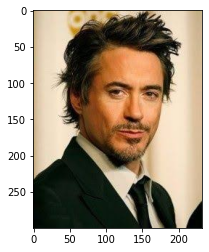

In [168]:
# Compute if the above image is existing in our known encodings database using raptor recog function
raptor_recog('rdj2')

Results 	 [0.9603425944855427, 0.8133625635844784, 0.886089179080736] 

Not found Natalia Portman in known db



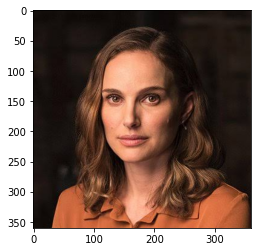

In [169]:
# Lets run our function on woman image and verify the distance
raptor_recog('Natalia Portman')
# We can observe distance is greater than that of clooney comparision

Results 	 [0.509655947970751, 0.7003104476155804, 0.8243767529388111] 

found Chris Helmsworth in the photo

Results 	 [0.8604743939342485, 1.047361509144143, 0.8723420509958338] 

Not found Chris Helmsworth in known db

Results 	 [1.013270756014221, 0.9859422656388155, 0.8692760509089104] 

Not found Chris Helmsworth in known db

Results 	 [0.868798806524608, 0.6974855358638101, 0.8041325012470397] 

Not found Chris Helmsworth in known db

Results 	 [0.8913663529346886, 0.706691135068031, 0.8695700797844026] 

Not found Chris Helmsworth in known db

Results 	 [0.8853708857235886, 0.8093246460044068, 0.8674919856910751] 

Not found Chris Helmsworth in known db

Results 	 [0.8695198784316274, 0.8126102482515281, 0.8048099409998282] 

Not found Chris Helmsworth in known db

Results 	 [0.9563215765219406, 1.0230540454700103, 0.8969579313861042] 

Not found Chris Helmsworth in known db



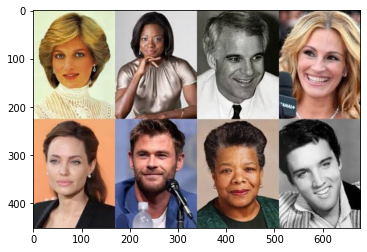

In [170]:
# Lets consider the case of multiple images.
# We can see Chrishelmsworth is present in the photo and our model predicted it
raptor_recog('Multiface')

Results 	 [0.733957054297992, 0.8476894302945757, 0.4428890751199932] 

found Robert Jr in the photo

Results 	 [0.6441580739256534, 0.8321110220577781, 0.7471915152191214] 

Not found Robert Jr in known db



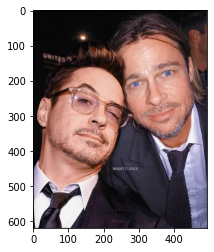

In [171]:
# Lets input an another image with Robert Jr and Brad pitt
raptor_recog('robert_pitt')
# We see that our model is working reasonable well

# Facial Landmarks

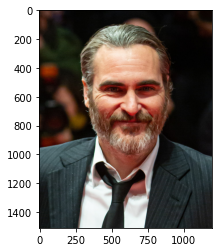

In [172]:
# Playing with facial landmarks
image = cv2.imread('gdrive/My Drive/DATA/Face_Recognition/phoenix.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [173]:
# Find all facial landmarks like chin location, facial features etc
# face_landmarks = face_recognition.face_landmarks(image)

image_landmarks_list = face_recognition.face_landmarks(image)

In [176]:
def raptor_landmark():
  name = input(' Enter image name: ')
  # Playing with facial landmarks
  image = cv2.imread('gdrive/My Drive/DATA/Face_Recognition/'+name+'.jpeg')
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  image_landmarks_list = face_recognition.face_landmarks(image)
  
  ax = plt.gca()

  for face_landmark in image_landmarks_list:
    # The face_landmark detection model returns the these features
    # chin, left_eyebrow, right_eyebrow, nose_bridge, nose_tip, left_eye, right_eye, top_lip, bottom_lip
    # Draw line over the eyebrow
    left_eyebrow_pts = face_landmark['left_eyebrow']
    pre_x,pre_y = left_eyebrow_pts[0]
    for (x,y) in left_eyebrow_pts[1:]:
      #cv2.line(image, (pre_x,pre_y), (x,y), color, thickness)
      l = lines.Line2D([pre_x,x],[pre_y,y],color = 'blue')
      ax.add_line(l)
      pre_x,pre_y = x,y
  
    right_eyebrow_pts = face_landmark['right_eyebrow']
    pre_x,pre_y = right_eyebrow_pts[0]
    for (x,y) in right_eyebrow_pts[1:]:
      #cv2.line(image, (pre_x,pre_y), (x,y), color, thickness)
      l = lines.Line2D([pre_x,x],[pre_y,y],color = 'blue')
      ax.add_line(l)
      pre_x,pre_y = x,y

    p = Polygon(face_landmark['top_lip'],facecolor = 'lightsalmon',edgecolor = 'orangered')
    ax.add_patch(p)
    p = Polygon(face_landmark['bottom_lip'],facecolor = 'lightsalmon',edgecolor = 'orangered')
    ax.add_patch(p)
    plt.show()



 Enter image name: phoenix


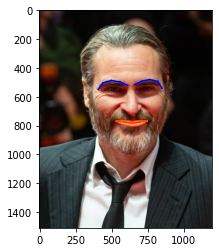

In [177]:
raptor_landmark()

 Enter image name: Natalia Portman


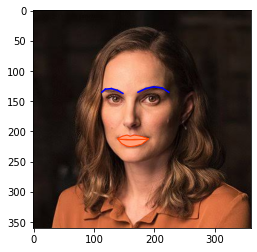

In [178]:
# Lets try for woman picture
raptor_landmark()

 Enter image name: chrisevans


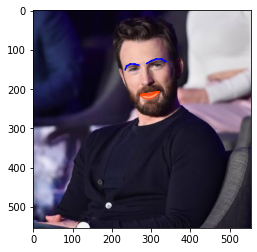

In [179]:
raptor_landmark()

 Enter image name: rdj2


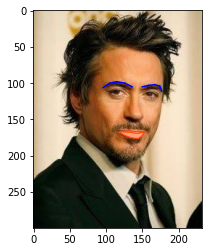

In [180]:
raptor_landmark()